# Primera ejecución

Para esta primera ejecución se hará lo siguiente:

- Se tendrá más de 100 asignaciones (más de 8000 pinturas)
- Se tendrá la división: 
    - 80% para entrenamiento
    - 20% para testeo

Librerías que usaremos

In [57]:
import os
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

Estos serán nuestros hiperparámetros

In [58]:
IMG_HEIGHT       = 300
IMG_WIDTH        = 300
BATCH_SIZE       = 64
EPOCHS           = 50
PCA_COMPONENTS   = 1000
SEED             = 1234
CONV             = 3 #Este es el tamaño del filtro del kernel
strPath     = "./generated_images"

Ahora creamos los sets de entrenamiento y validación. Por motivos de limitaciones computacionales usaremos las imágenes escaladas (las cuales tiene un ejemplo de cada clase)

In [59]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  strPath,
  validation_split = 0.2,
  subset     = "training",
  seed       = SEED,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE)

Found 1275 files belonging to 51 classes.
Using 1020 files for training.


In [60]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  strPath,
  validation_split = 0.2,
  subset     = "validation",
  seed       = SEED,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE)

Found 1275 files belonging to 51 classes.
Using 255 files for validation.


Dataset a array de numpy

In [61]:
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

In [62]:
train_images, train_labels = dataset_to_numpy(train_ds)
val_images, val_labels = dataset_to_numpy(val_ds)

2024-12-09 22:04:26.973904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1020]
	 [[{{node Placeholder/_4}}]]
2024-12-09 22:04:26.974122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1020]
	 [[{{node Placeholder/_0}}]]
2024-12-09 22:04:27.946738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [255]
	

In [63]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)

In [64]:
pca = PCA(n_components=PCA_COMPONENTS)
train_images_pca = pca.fit_transform(train_images_flat)
val_images_pca = pca.transform(val_images_flat)

In [65]:
train_images_pca = train_images_pca / 255.0
val_images_pca = val_images_pca / 255.0


In [66]:
class_names = train_ds.class_names

num_classes = len(class_names)

print(class_names)

['Albrecht_Dürer', 'Albrecht_Du╠êrer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 'Andy_Warhol', 'Camille_Pissarro', 'Caravaggio', 'Claude_Monet', 'Diego_Rivera', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Eugene_Delacroix', 'Francisco_Goya', 'Frida_Kahlo', 'Georges_Seurat', 'Giotto_di_Bondone', 'Gustav_Klimt', 'Gustave_Courbet', 'Henri_Matisse', 'Henri_Rousseau', 'Henri_de_Toulouse-Lautrec', 'Hieronymus_Bosch', 'Jackson_Pollock', 'Jan_van_Eyck', 'Joan_Miro', 'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne', 'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Piet_Mondrian', 'Pieter_Bruegel', 'Raphael', 'Rembrandt', 'Rene_Magritte', 'Salvador_Dali', 'Sandro_Botticelli', 'Titian', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'William_Turner']


In [67]:
model_pca = Sequential([
    layers.Dense(128, activation='relu', input_shape=(PCA_COMPONENTS,)),
    layers.Dense(num_classes, activation='softmax')
])

In [68]:
opti = tf.keras.optimizers.RMSprop(momentum=0.1) 
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
metr = ['accuracy']

In [69]:
model_pca.compile(optimizer=opti, loss=loss, metrics=metr)


In [70]:
history_pca = model_pca.fit(
    train_images_pca, train_labels,
    validation_data=(val_images_pca, val_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/50


/home/axshy/miniconda3/envs/TensorFlow/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 30ms/step - loss: 8.7343 - accuracy: 0.0451 - val_loss: 6.2075 - val_accuracy: 0.1020
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 3.0655 - accuracy: 0.3804 - val_loss: 5.3776 - val_accuracy: 0.1765
Epoch 3/50
16/16 [==============================] - 0s 19ms/step - loss: 1.0625 - accuracy: 0.7696 - val_loss: 4.9897 - val_accuracy: 0.1922
Epoch 4/50
16/16 [==============================] - 0s 23ms/step - loss: 0.2557 - accuracy: 0.9725 - val_loss: 4.9510 - val_accuracy: 0.1922
Epoch 5/50
16/16 [==============================] - 0s 14ms/step - loss: 0.0736 - accuracy: 0.9961 - val_loss: 4.9741 - val_accuracy: 0.2196
Epoch 6/50
16/16 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 5.0329 - val_accuracy: 0.2196
Epoch 7/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 5.0407 - val_accuracy: 0.2235
Epoch 8/50
16/16 [=======

In [72]:
model_pca.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               128128    
                                                                 
 dense_9 (Dense)             (None, 51)                6579      
                                                                 
Total params: 134,707
Trainable params: 134,707
Non-trainable params: 0
_________________________________________________________________


Ahora graficaremos la función de pérdida y la presición (`accuracy`)

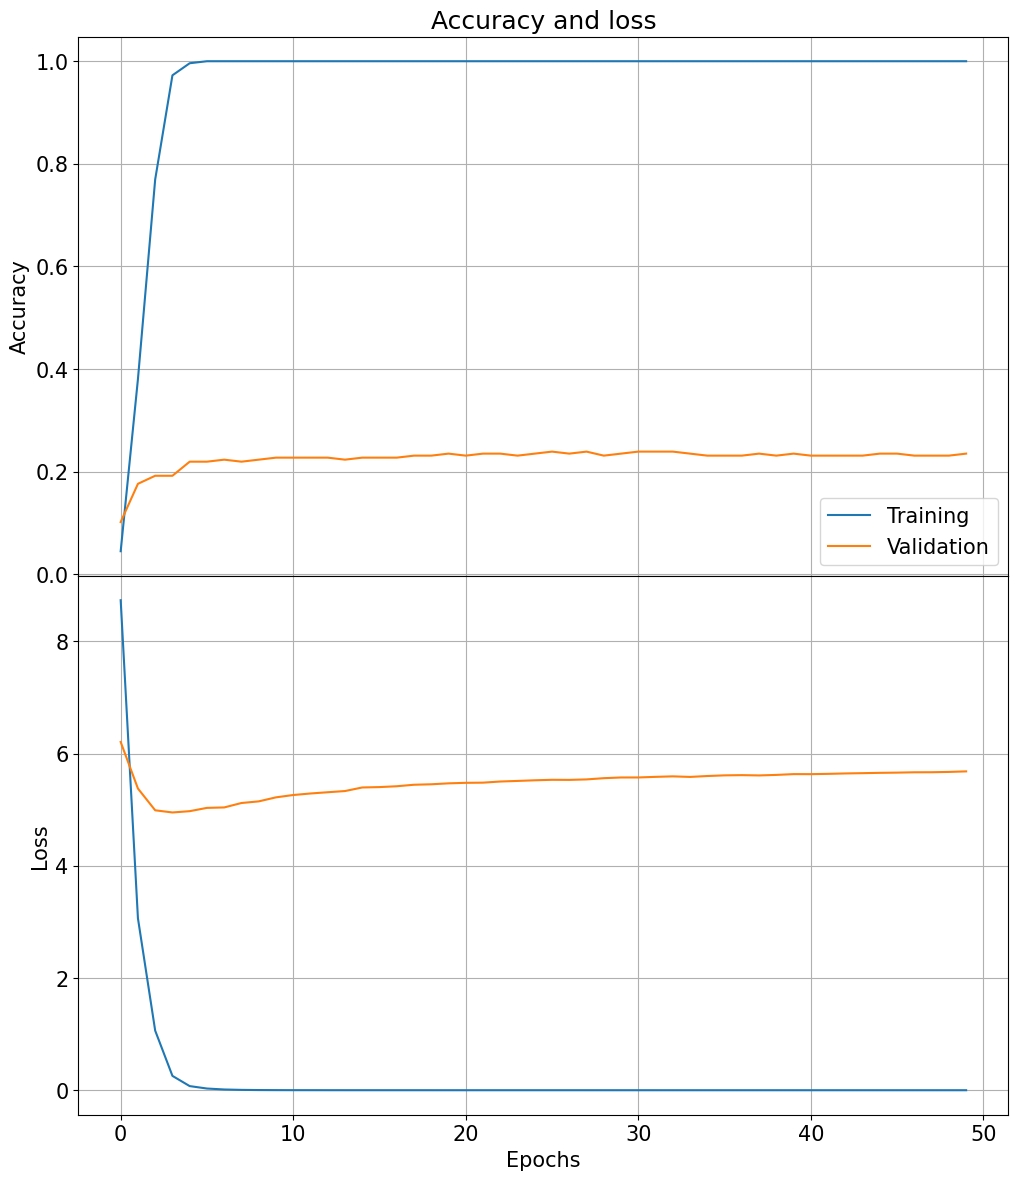

In [74]:
acc      = history_pca.history['accuracy']
val_acc  = history_pca.history['val_accuracy']
loss     = history_pca.history['loss']
val_loss = history_pca.history['val_loss']

epochs_range = range(EPOCHS)

plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(12, 14))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

ax0 = plt.subplot(gs[0])
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title('Accuracy and loss')
plt.ylabel("Accuracy")
plt.grid(True)

ax1 = plt.subplot(gs[1], sharex = ax0)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

plt.subplots_adjust(hspace=.0)
plt.show()

In [ ]:
def truncate_labels(labels, max_length=10):
    return [label[:max_length] + "..." if len(label) > max_length else label for label in labels]

y_true = val_labels
y_pred = np.argmax(model_pca.predict(val_images_pca), axis=1)

cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

truncated_class_names = truncate_labels(class_names, max_length=10)

8/8 [==============================] - 0s 11ms/step


/tmp/ipykernel_121824/538436030.py:13: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


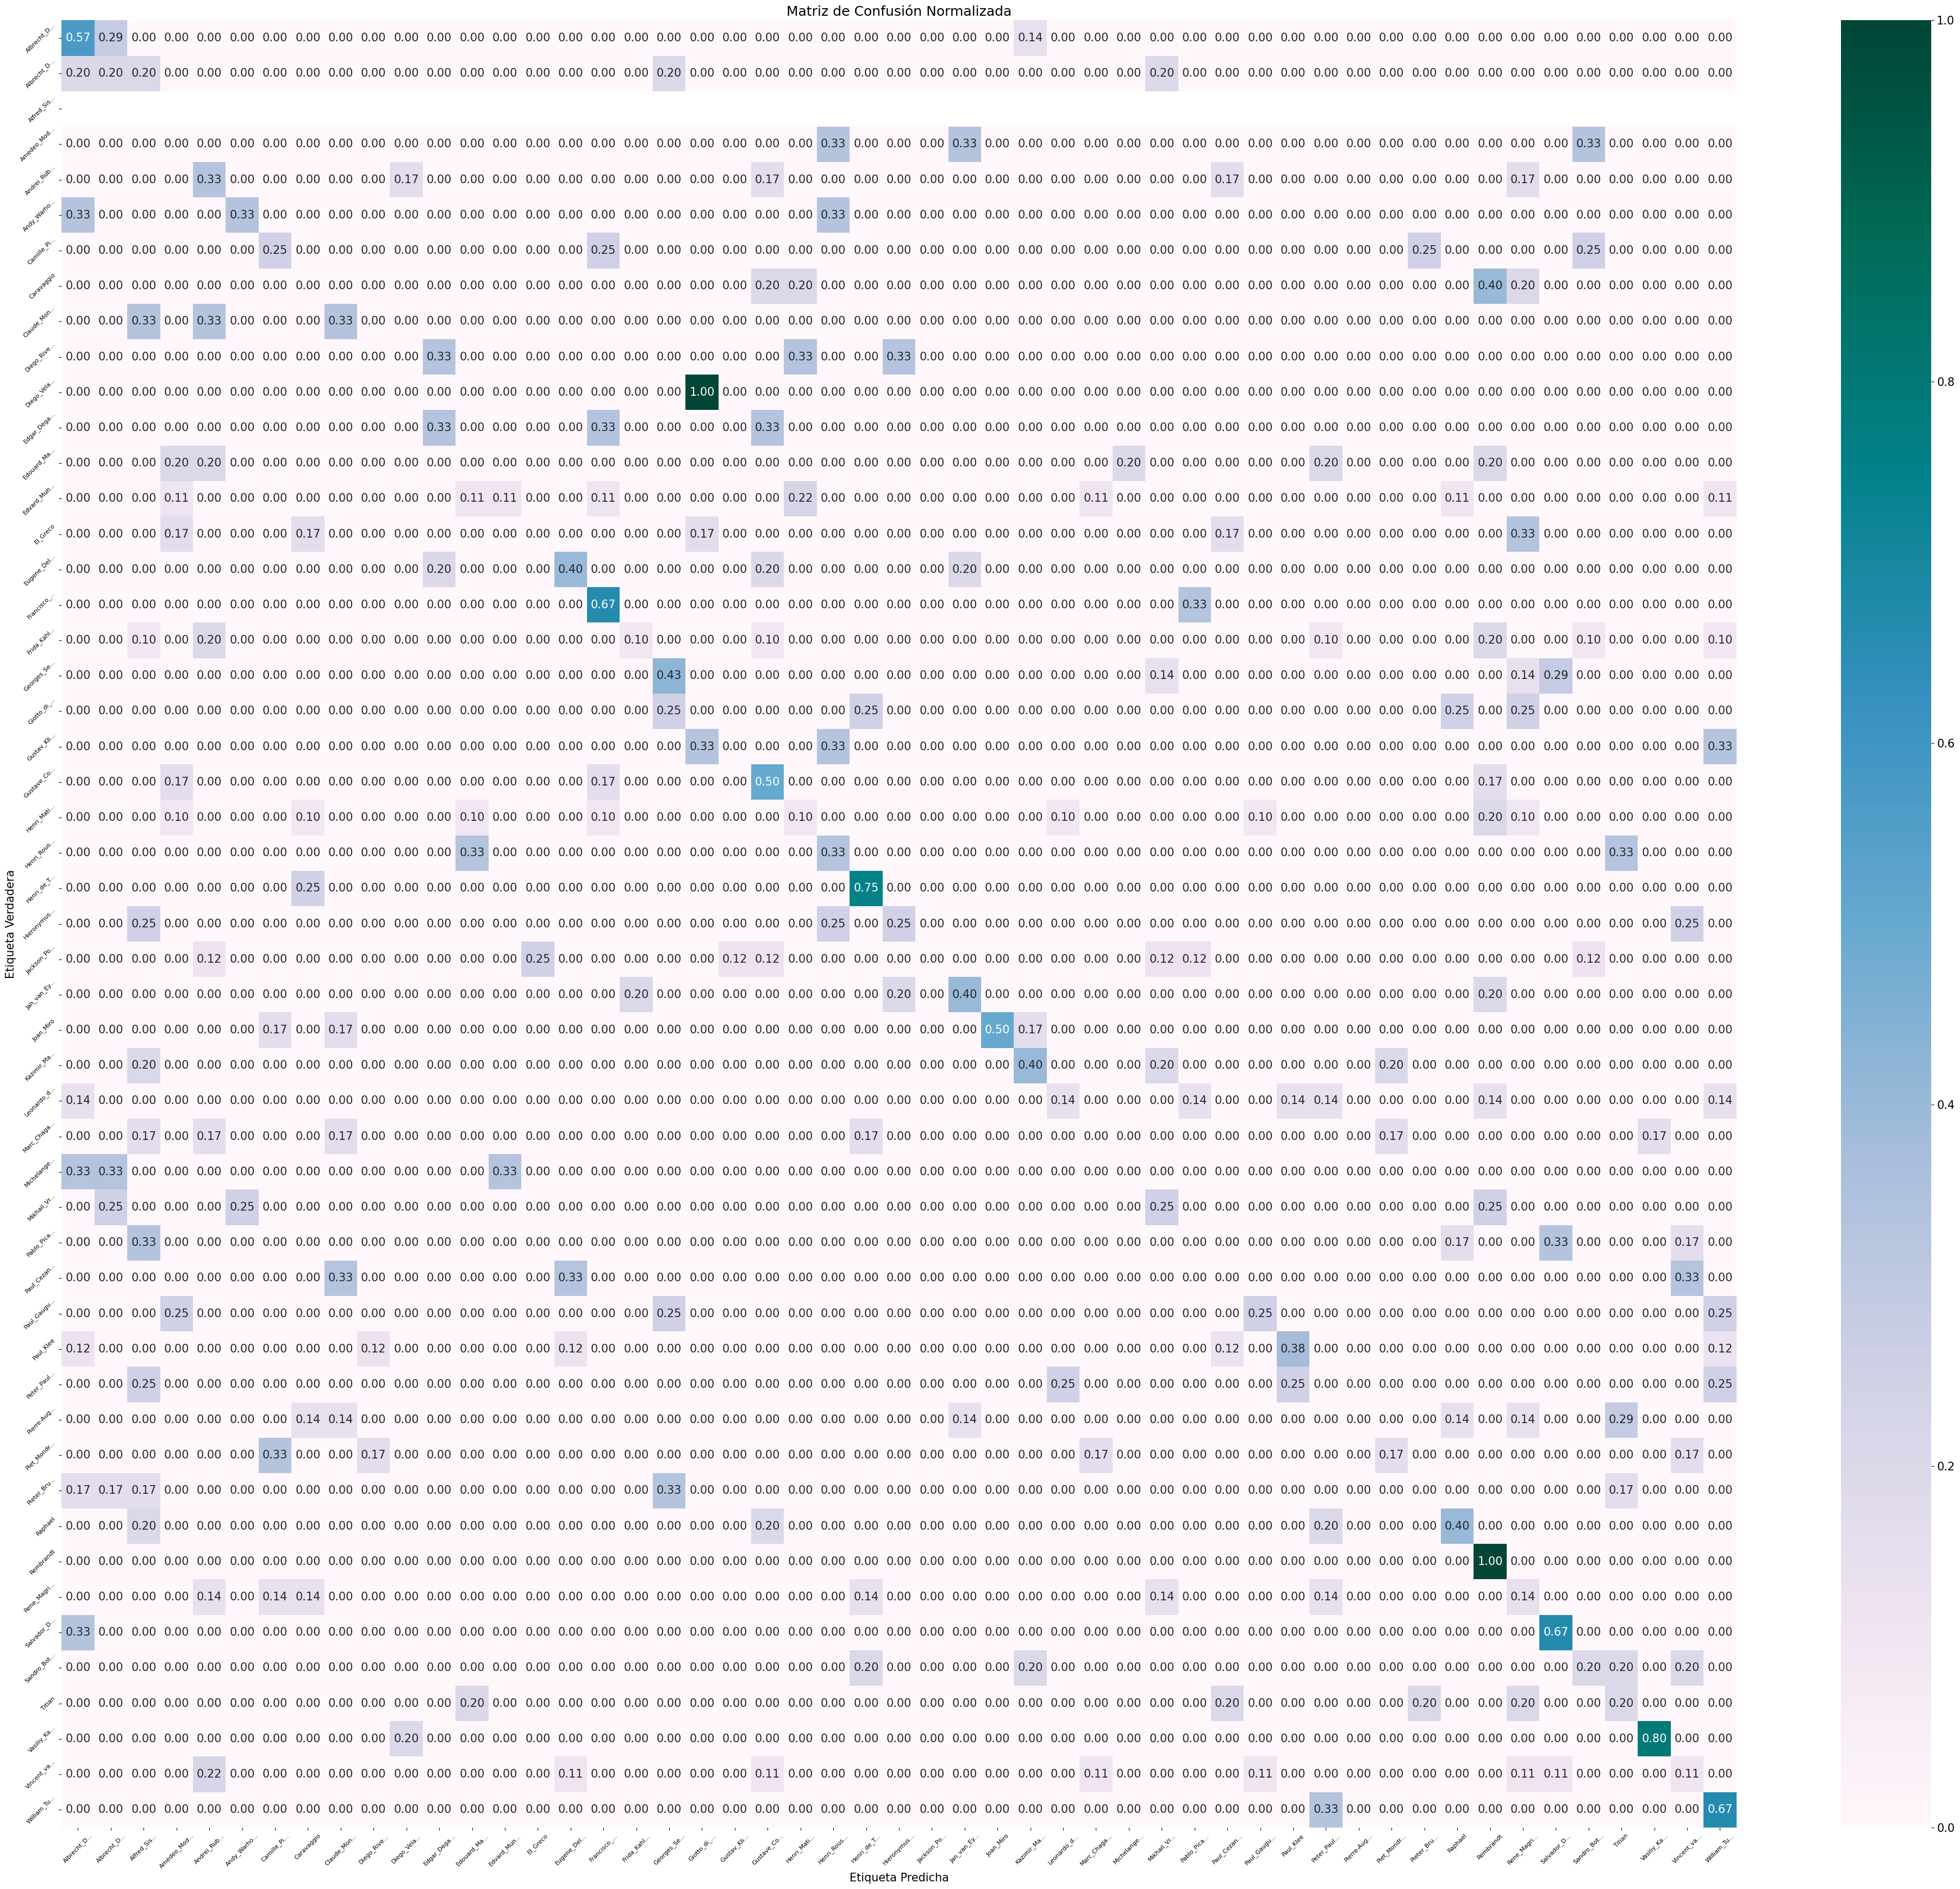

In [79]:

# Crear el mapa de calor
plt.figure(figsize=(40, 35))  # Ajustar tamaño de la figura
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="PuBuGn",
            xticklabels=truncated_class_names, yticklabels=truncated_class_names)

# Configuración del gráfico
plt.title("Matriz de Confusión Normalizada")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45, fontsize=8)
plt.tight_layout()

# Guardar y mostrar la matriz
plt.savefig('confusion_matrix_pca.png')
plt.show()


Ahora graficaremos la matriz de confusión la cual nos indica que tan bueno es nuestro modelo.

In [ ]:
def truncate_labels(labels, max_length=10):
    return [label[:max_length] + "..." if len(label) > max_length else label for label in labels]

y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

truncated_class_names = truncate_labels(class_names, max_length=10)

1/1 [==============================] - 0s 92ms/step


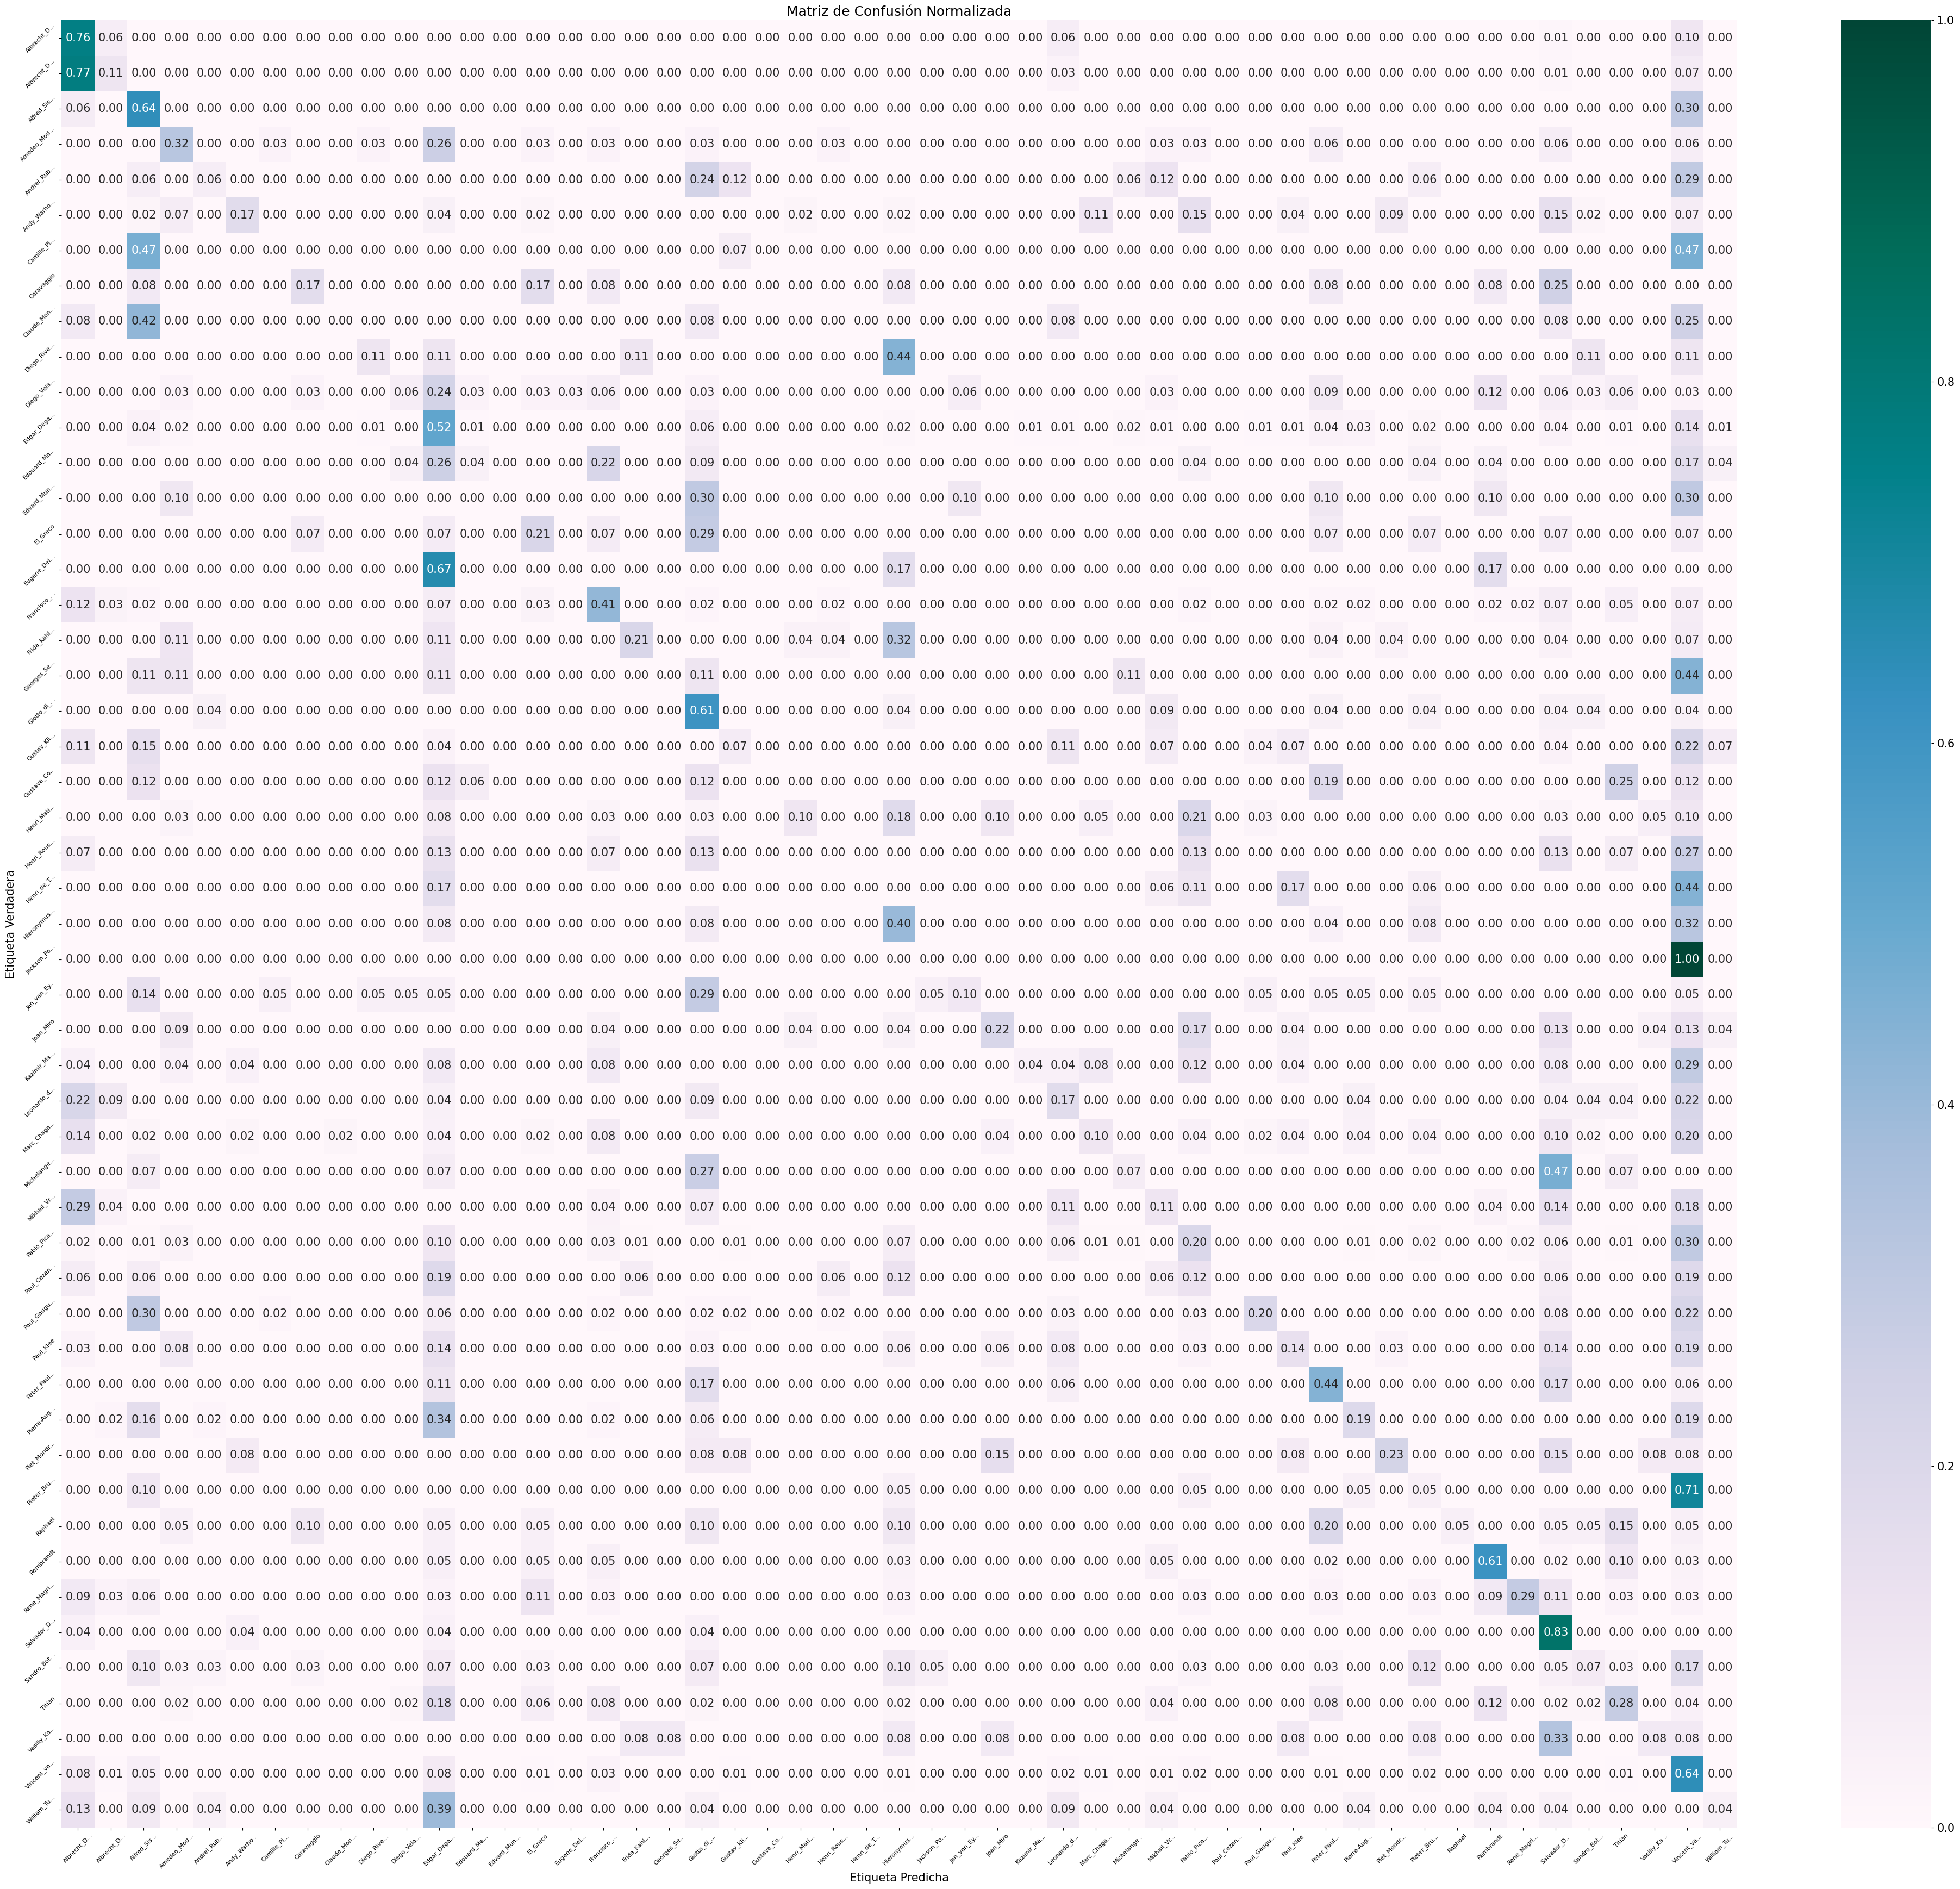

In [ ]:
plt.figure(figsize=(40,35))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="PuBuGn",
            xticklabels=truncated_class_names, yticklabels=truncated_class_names)

plt.title("Matriz de Confusión Normalizada")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.xticks(rotation=45, fontsize=8)  # Ajustar tamaño de fuente
plt.yticks(rotation=45, fontsize=8)  # Ajustar tamaño de fuente
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


Media de la confiabilidad

In [ ]:
mean_acc = np.mean(acc)
mean_val_acc = np.mean(val_acc)

print(f"Media de confiabilidad (entrenamiento): {mean_acc:.2f}")
print(f"Media de confiabilidad (validación): {mean_val_acc:.2f}")

Mediana de la confiabilidad

In [ ]:
median_train_accuracy = statistics.median(acc)
median_val_accuracy = statistics.median(val_acc)

print("Mediana de accuracy en entrenamiento:", median_train_accuracy)
print("Mediana de accuracy en validación:", median_val_accuracy)